#Objective:
####To explore the Haberman Cancer Survival Dataset and find which feature or combination of feature are helpfull in determining the status of a person in 5 years after the operation.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("data.csv")
df.head(5)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
df.columns=['age', 'op_year', 'axil_nodes', 'surv_status']  
print(df.columns)

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


In [5]:
#Datapoint per class.
#surv_status: 1-Survived,2-Died
df["surv_status"] = df["surv_status"].apply(lambda x: "Survived" if x == 1 else "Died")

In [6]:
df.head(5)

,age,op_year,axil_nodes,surv_status
0,30,62,3,Survived
1,30,65,0,Survived
2,31,59,2,Survived
3,31,65,4,Survived
4,33,58,10,Survived


In [7]:
df["surv_status"].value_counts()

Survived    224
Died         81
Name: surv_status, dtype: int64

#Observations:
- The dataset has 4 features/variable and 305 data points.
- The dataset has 224 datapoint labeled as "1" and 81 datapoint labeled as "2".
- The dataset is an imbalance dataset.(w.r.t. observation.point(3)).

#Univarient Analysis
####Univerarient analysis on the data-set will help us explore a single feature/Variable. Univerarient analysis includes Histogram, CDF, PFD etc.

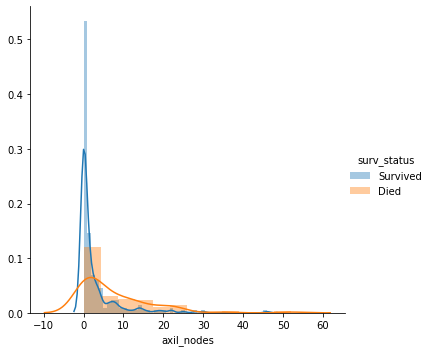

In [10]:
# Distribution for axil_ nodes of Operation 
sns.FacetGrid(df, hue="surv_status", size=5)\
.map(sns.distplot, "axil_nodes").add_legend();
plt.show();

#Observation
- As number of auxillary nodes are increasing , survival rate decreases.
- Patient with nodes more than 20 have lower chances of survival.
- Patient with 0-3 axil node had higher chances of survival.
- Data is overlapping hence we can't find "point" and "if-else" conditions to build a simple model to classify the survive and death from this observations.

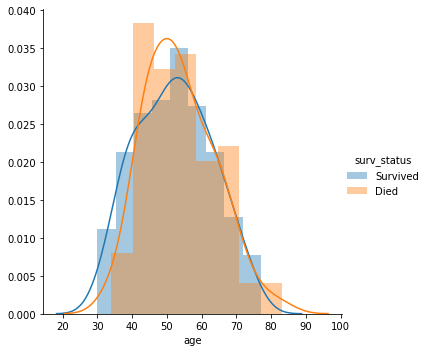

In [11]:
# Distribution for Age of Operation 
sns.FacetGrid(df, hue="surv_status", size=5)\
.map(sns.distplot, "age").add_legend();
plt.show();

#Observations
- Major overlapping is observed which tells us that survival chances are irrespective of persons age .
- Patients with age less than 40 yrs has higher chance to survive and patient with age more than 78 yrs are most likely to died within 5 yrs.

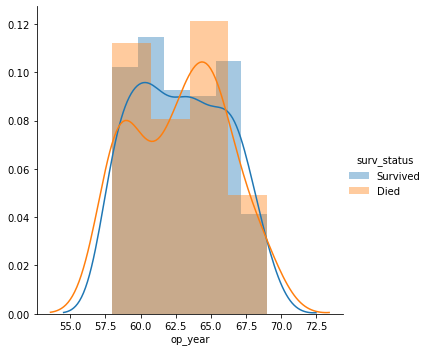

In [12]:
# Distribution of Operation Year
sns.FacetGrid(df, hue="surv_status", size=5)\
.map(sns.distplot, "op_year").add_legend();
plt.show();

#Observations
- Major overelapping is observed.
- Year 1960 - 1965 had the most unssuccessful operations.
- We cannot determine conclusion based on this parameter.

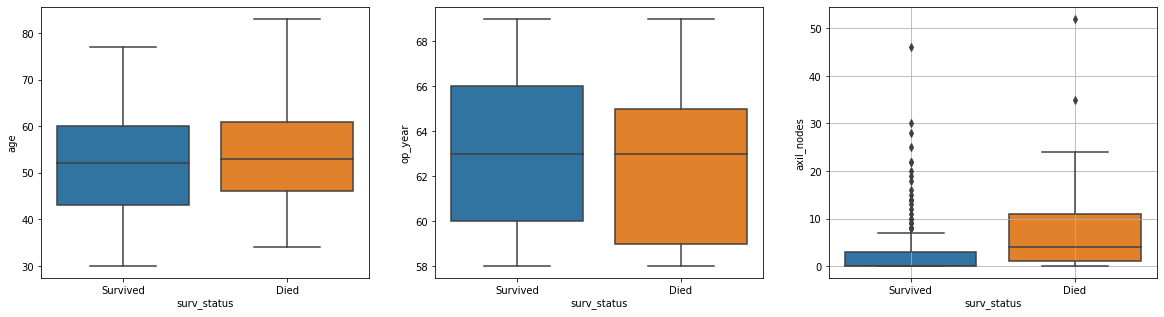

In [13]:
# Box_plot
plt.figure(figsize=(20,5))
j=1
for features in (list(df.columns)[:-1]):  
    plt.subplot(1,3,j); j+=1 
    sns.boxplot(x= 'surv_status',y= features,data=df)
plt.grid()    
plt.show()

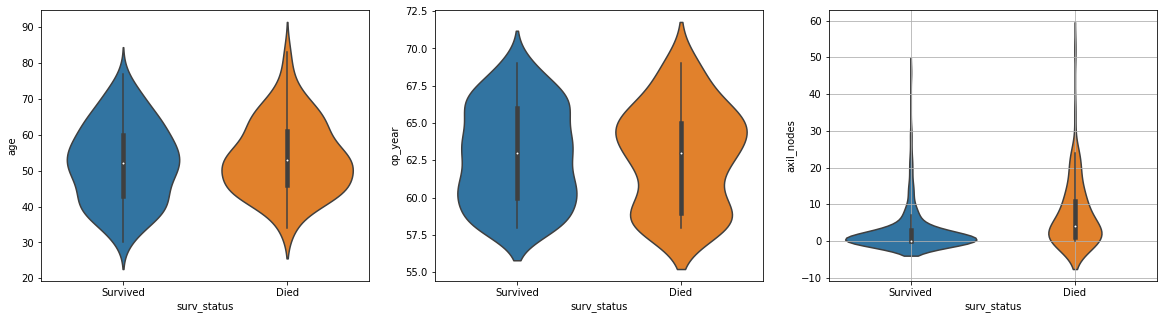

In [14]:
# violin_plot
plt.figure(figsize=(20,5))
k=1
for features in (list(df.columns)[:-1]):  
    plt.subplot(1,3,k); k+=1 
    sns.violinplot(x= 'surv_status',y= features,data=df)
plt.grid()
plt.show()

#Observations:
- No major conclusion could be drawn from this plots as the data points are overlapping (i.e. scattered within the same range of values).
- The number of axil node for survival is dense from 0-5.


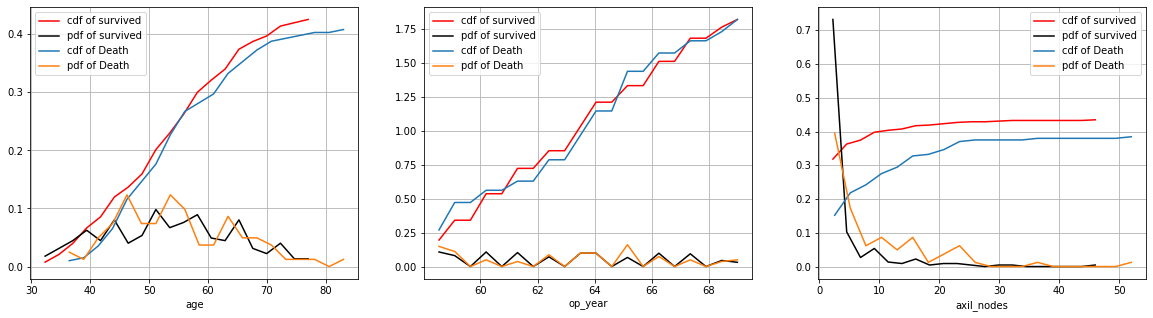

In [16]:
#From PDF we can say about the patients survival status,but cannot exactly say what percentage of people will short or long survive. 
#To know that we have another distribution that is CDF.

Survived= df.loc[df["surv_status"]== "Survived"]
Died = df.loc[df["surv_status"]=="Died"]

plt.figure(figsize=(20,5))
i=1
for state in (list(df.columns)[:-1]):
#survived
    plt.subplot(1,3,i)
    Counts , bin_edges = np.histogram(Survived[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of survived",color="red")
    plt.plot(bin_edges[1:],pdf,label="pdf of survived",color="black")

#Death
    Counts , bin_edges = np.histogram(Died[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of Death")
    plt.plot(bin_edges[1:],pdf,label="pdf of Death")
    plt.xlabel(state)
    plt.grid()
    plt.legend()
    i+=1
plt.show()


plt.show();

#Observations
- There is 85% chances of long survival if number of nodes is less than 5 and there is 100% chance of short survival if number of nodes is greater than 40.
- Also it has been seen that the patient with axil nodes <22 has has better probability of survival and Patient with 0-2 axil node are more likely to survive.
- Patient with age between age 32-35 has definitly survived the operation and pataient aged 78-83 has definitly not survived the operation.

Bivariate Analysis

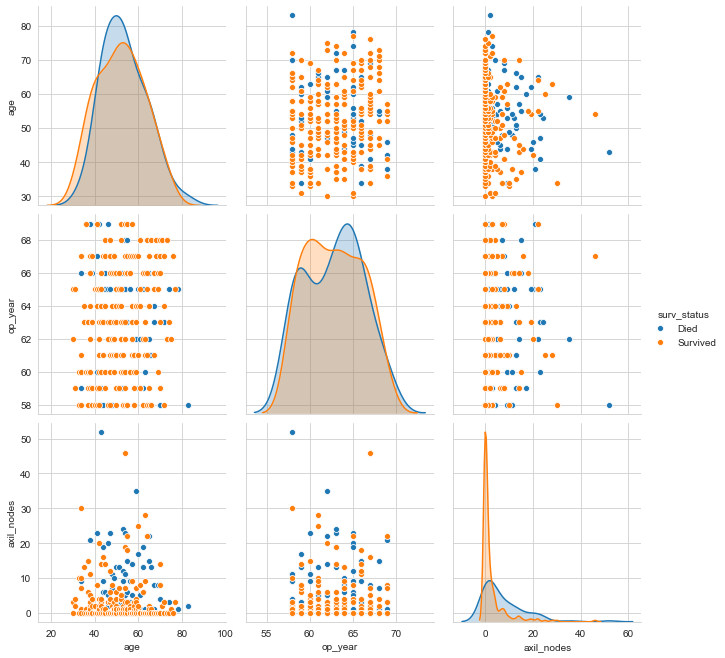

In [18]:
#Pair Plot
df['surv_status'] = df['surv_status'].astype('category')
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="surv_status",vars = ["age","op_year","axil_nodes"], size = 3)
plt.show()

#Observations
####The data are highly mixed up, none of the variable-pairs can help us find linearly separable clusters hence we can't find "lines" and "if-else" conditions to build a simple model to classify the survive status of the patient.

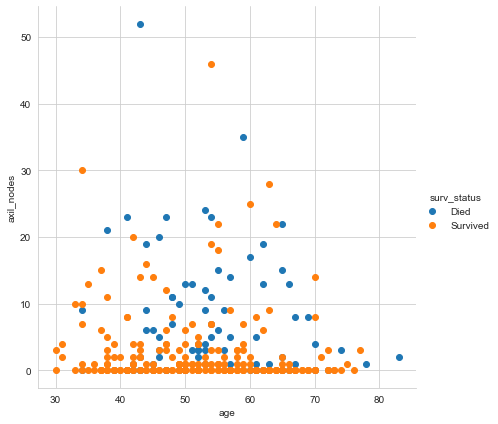

In [19]:
#Scatter Plot
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="surv_status", size=6) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend()
plt.show()

#Observations
- There are hardly any patients with nodes more than 27
- Patients with age more than 50 having nodes more than 10 are more prone to death.